# PublicSource Corporate Ownership Analysis

By Nora Mattson, Data Intern

One of the key motivations for community land trusts is the encouragement of owner-occupied housing, maybe because there is a fear of prices being driven up by rapid resales or speculative investment. Therefore, we thought it might be relevant to show how many residential properties in a neighborhood have corporate ownership. This is not a perfect representation of how many owner-occupied houses there are in a neighborhood, nor is it necessarily a predictor of  about anything in the housing market, but it is something that many brought up in their motivation for creating a land trust, so it felt relevant to see how the neighborhoods actually compared.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

We used WPRDC's [Parcels n'at tool](http://tools.wprdc.org/parcels-n-at/#) because it makes it nice and easy to replicate with these or other neighborhoods. However, it is important to note that county assessment data doesn't always have the most updated real estate transactions, which is why we are only analysing 2008-2018. Take a look at this [assessment data user guide](https://docs.google.com/document/d/1eYuJOh4_CBitclhhgeJv6iLStPjtouhXV1_2cwei_-s/edit) from WPRDC if you are interested in learning more about this data. 

In [2]:
neighborhoods = ["westoakland","bedforddwellings","centrallv","centraloakland","crawfordroberts","etna", 
                 "fineview","garfield","lowerlv","middlehill","millvale","northoakland","perryhilltop",
                 "polishhill","sharpsburg","southoakland","terracevillage","upperhill","upperlv"]
#data from WRPDC's parcels n'at tool, select the "house hunting" custom field list and add owner description

Then we put all of the different CSVs into a dataframe for analysis.

In [3]:
dfs = []
#add all of the neighborhoods to the dataframe
for nbhd in neighborhoods:
    df = pd.read_csv("median/%s.csv"%(nbhd))
    df["neighborhood__asmt"] = nbhd
    dfs.append(df)
corpdf = pd.concat(dfs)
#rename columns
corpdf.rename(columns=lambda x: x[:-6], inplace=True)

The Hill District is broken up into a bunch of smaller communities, as is Oakland and Lawrenceville, so we will go ahead and group them together. Additionally, let's look at the neighborhoods being grouped for community land trusts, Perry Hilltop and Fineview, as well as Etna, Millvale and Sharpsburg, together, which will mirror how they are discussed in the article and increase the sample size of the groups we are looking at. 

In [4]:
#rename all of the neighburhoods with multiple census tracts
corpdf.loc[corpdf["neighborhood"].isin(["westoakland", "centraloakland","northoakland","southoakland"]), "neighborhood"] = "oakland"
corpdf.loc[corpdf["neighborhood"].isin(["bedforddwellings", "crawfordroberts","upperhill","terracevillage","middlehill"]), "neighborhood"] = "hilldistrict"
corpdf.loc[corpdf["neighborhood"].isin(["upperlv", "centrallv","lowerlv"]), "neighborhood"] = "lawrenceville"
#for the sake of this analysis, we are grouping neighborhoods that are forming a CLT together
corpdf.loc[corpdf["neighborhood"].isin(["etna", "millvale","sharpsburg"]), "neighborhood"] = "riverboroughs"
corpdf.loc[corpdf["neighborhood"].isin(["perryhilltop", "fineview",]), "neighborhood"] = "perryhilltop/fineview"

corpdf["neighborhood"].unique()

array(['oakland', 'hilldistrict', 'lawrenceville', 'riverboroughs',
       'perryhilltop/fineview', 'garfield', 'polishhill'], dtype=object)

Next, we are only looking at residential properties that have a structure on them.

In [5]:
res = corpdf.loc[corpdf["CLASSDESC"]=="RESIDENTIAL"]
res = res.loc[res.USEDESC !='VACANT LAND']

In order to figure out the percentage of each type of ownership, group it by neighborhood, and type of owner, and find percentages in each neighborhood.

In [7]:
resown = res.groupby(["neighborhood","OWNERDESC"]).size()
by_own = resown.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
by_own

#corporations are coded as "CORPORATION", individuals are coded as the different categories of "REGULAR"

neighborhood           OWNERDESC             
garfield               CORPORATION               23.543496
                       REGULAR                   55.307263
                       REGULAR-ETAL               6.304868
                       REGULAR-ETUX OR ET VIR    14.764565
                       REGULAR-UNFINISHED         0.079808
hilldistrict           CORPORATION               18.933205
                       REGULAR                   58.865930
                       REGULAR-ETAL               7.544450
                       REGULAR-ETUX OR ET VIR    14.656415
lawrenceville          CORPORATION               18.454825
                       CORPORATION-RAILROAD       0.025667
                       CORPORATION-UNFINISHED     0.025667
                       REGULAR                   50.744353
                       REGULAR-ESTATE             0.025667
                       REGULAR-ETAL               8.187885
                       REGULAR-ETUX OR ET VIR    22.535934
oakland   

We are primarily interested in the amount of corporate ownership, so let's make a quick graph of that. 

,0
neighborhood,
garfield,23.543496
hilldistrict,18.933205
lawrenceville,18.454825
oakland,18.256042
perryhilltop/fineview,17.225839
polishhill,9.795918
riverboroughs,10.768413


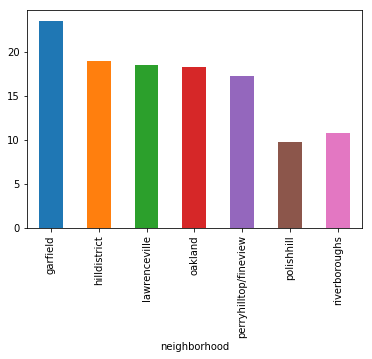

In [8]:
#flip the levels so it's easier to graph
resown = res.groupby(["OWNERDESC","neighborhood"]).size()
by_own = resown.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))
by_own["CORPORATION"].plot(kind = "bar")
pd.DataFrame(by_own["CORPORATION"])

Finally, here is the end product in the article: 
![Median Prices](land_trust_graphics/corporatevsnon.png)